# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
cd /Users/pengyuewang/deep-reinforcement-learning/python

/Users/pengyuewang/deep-reinforcement-learning/python


In [2]:
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
import numpy as np
import torch

In [3]:
cd /Users/pengyuewang/deep-reinforcement-learning/p2_continuous-control

/Users/pengyuewang/deep-reinforcement-learning/p2_continuous-control


In [4]:
from Agent_NN import Agent

In [5]:
env = UnityEnvironment(file_name='Reacher.app')
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


###  Take Random Actions in the Environment

In [ ]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

env.close()

### Train an agent by DDPG

In [6]:
agent = Agent(state_size =33, action_size = 4, seed = 0)

In [7]:
def DDPG_epoch(n_episode = 1200):          
    score_list = []
    for i_episode in range(1, n_episode+1):
        print('-------------')
        print("episode",i_episode)
        print('-------------')
        agent.reset()
        env_info = env.reset(train_mode=True)[brain_name] 
        states = env_info.vector_observations                  
        scores = np.zeros(1)
        while True:
            actions = agent.act(np.array(states))[0][0]
        
            env_info = env.step(actions)[brain_name] 
            next_states = env_info.vector_observations       
            rewards = env_info.rewards                         
            dones = env_info.local_done
            
            scores += rewards
            
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
                
            if np.any(dones):                               
                break
                
        print('Score:',scores[0])
        score_list.append(scores[0])
        
        if scores[0] > 35:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_35.pth')
        elif scores[0] > 40:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_40.pth')
        
    torch.save(agent.actor_local.state_dict(), 'checkpoint.pth')
    print("Weights saved!")
    return score_list

In [8]:
score_list = DDPG_epoch(n_episode = 500)

-------------
episode 1
-------------


/Users/pengyuewang/deep-reinforcement-learning/p2_continuous-control/Agent_NN.py:88: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)


Score: 0.4399999901652336
-------------
episode 2
-------------
Score: 0.0
-------------
episode 3
-------------
Score: 0.8899999801069498
-------------
episode 4
-------------
Score: 0.4899999890476465
-------------
episode 5
-------------
Score: 0.29999999329447746
-------------
episode 6
-------------
Score: 0.24999999441206455
-------------
episode 7
-------------
Score: 1.3299999702721834
-------------
episode 8
-------------
Score: 1.3799999691545963
-------------
episode 9
-------------
Score: 1.0499999765306711
-------------
episode 10
-------------
Score: 1.6799999624490738
-------------
episode 11
-------------
Score: 0.549999987706542
-------------
episode 12
-------------
Score: 1.7199999615550041
-------------
episode 13
-------------
Score: 1.2599999718368053
-------------
episode 14
-------------
Score: 0.7199999839067459
-------------
episode 15
-------------
Score: 0.4599999897181988
-------------
episode 16
-------------
Score: 1.3499999698251486
-------------
episode

Score: 13.97999968752265
-------------
episode 129
-------------
Score: 12.519999720156193
-------------
episode 130
-------------
Score: 5.45999987795949
-------------
episode 131
-------------
Score: 8.309999814257026
-------------
episode 132
-------------
Score: 8.359999813139439
-------------
episode 133
-------------
Score: 14.299999680370092
-------------
episode 134
-------------
Score: 8.82999980263412
-------------
episode 135
-------------
Score: 10.779999759048223
-------------
episode 136
-------------
Score: 14.749999670311809
-------------
episode 137
-------------
Score: 12.409999722614884
-------------
episode 138
-------------
Score: 10.929999755695462
-------------
episode 139
-------------
Score: 15.399999655783176
-------------
episode 140
-------------
Score: 11.799999736249447
-------------
episode 141
-------------
Score: 12.249999726191163
-------------
episode 142
-------------
Score: 17.46999960951507
-------------
episode 143
-------------
Score: 15.18999966

Score: 36.47999918460846
-------------
episode 255
-------------
Score: 39.41999911889434
-------------
episode 256
-------------
Score: 37.509999161586165
-------------
episode 257
-------------
Score: 37.8899991530925
-------------
episode 258
-------------
Score: 34.46999922953546
-------------
episode 259
-------------
Score: 37.17999916896224
-------------
episode 260
-------------
Score: 37.49999916180968
-------------
episode 261
-------------
Score: 31.699999291449785
-------------
episode 262
-------------
Score: 38.99999912828207
-------------
episode 263
-------------
Score: 30.779999312013388
-------------
episode 264
-------------
Score: 39.22999912314117
-------------
episode 265
-------------
Score: 34.99999921768904
-------------
episode 266
-------------
Score: 33.21999925747514
-------------
episode 267
-------------
Score: 31.429999297484756
-------------
episode 268
-------------
Score: 32.07999928295612
-------------
episode 269
-------------
Score: 26.309999411925

Score: 33.749999245628715
-------------
episode 381
-------------
Score: 39.039999127388
-------------
episode 382
-------------
Score: 35.30999921076
-------------
episode 383
-------------
Score: 35.569999204948545
-------------
episode 384
-------------
Score: 37.72999915666878
-------------
episode 385
-------------
Score: 31.769999289885163
-------------
episode 386
-------------
Score: 39.08999912627041
-------------
episode 387
-------------
Score: 33.31999925523996
-------------
episode 388
-------------
Score: 38.83999913185835
-------------
episode 389
-------------
Score: 34.329999232664704
-------------
episode 390
-------------
Score: 38.69999913498759
-------------
episode 391
-------------
Score: 39.4999991171062
-------------
episode 392
-------------
Score: 37.91999915242195
-------------
episode 393
-------------
Score: 35.32999921031296
-------------
episode 394
-------------
Score: 37.95999915152788
-------------
episode 395
-------------
Score: 38.8699991311878
---

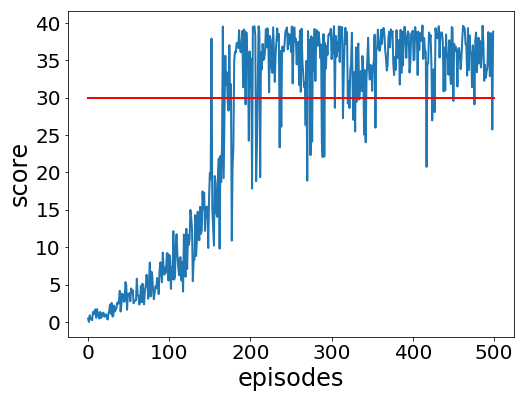

In [9]:
plt.figure(figsize = (8,6))
plt.plot(score_list,lw = 2)
plt.plot([0,500],[30,30],c = 'r',lw = 2)
plt.xlabel('episodes',fontsize = 24)
plt.ylabel('score',fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [10]:
np.mean(score_list[-100:])

35.84409919882193

In [ ]:
env.close()

### Use the trained agent

In [ ]:
agent = Agent(state_size =33, action_size = 4, seed = 10)
agent.actor_local.load_state_dict(torch.load('checkpoint_35.pth'))

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = agent.act(np.array(states))[0][0]
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

env.close()